# Problem 1

In [1]:
%pylab inline

import numpy as np
from scipy import stats
from sklearn import datasets

Populating the interactive namespace from numpy and matplotlib


In [2]:
def kNN(k, test_point, training_points, training_labels):
    distances = ((training_points - test_point)**2).sum(axis=1)
    indices = argsort(distances)
    return stats.mode(array([training_labels[index] for index in indices[:k]]))[0][0]

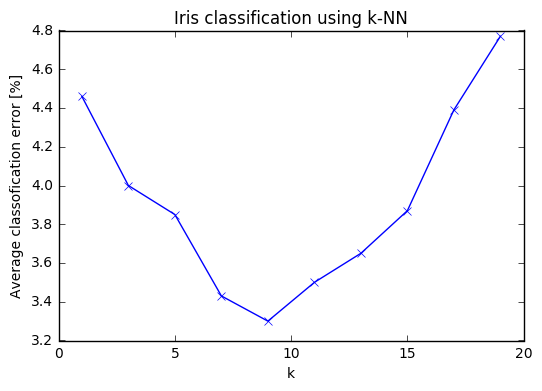

In [3]:
iris = datasets.load_iris()
iris_set = column_stack((iris.data, iris.target))

errors = array([0]*10)
training_size, test_size = 100, 50
tries = 200
for i in range(tries):
    random.shuffle(iris_set)
    training_set, test_set = iris_set[:training_size], iris_set[training_size:]
    for k in range(1,20,2):
        for test_data in test_set:
            label = kNN(k, test_data[:-1], training_set[:, :-1], training_set[:, -1])
            if label != test_data[-1]:
                errors[k/2] += 1
errors_percentages = errors*100.0/(test_size*tries)

plot(range(1,20,2), errors_percentages, marker='x')
xlabel('k')
ylabel('Average classofication error [%]')
title('Iris classification using k-NN')

In [4]:
def load_digits(filename):
    data, labels = [], []
    with open(filename, "r") as f:
        for line in f:
            splitted = [int(x) for x in line.split(",")]
            data.append(splitted[:-1])
            labels.append(splitted[-1])
    return np.array(data), np.array(labels)

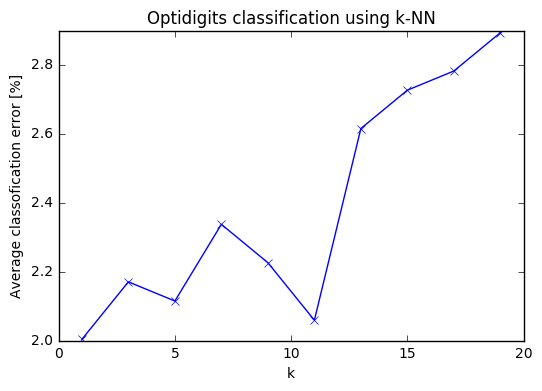

In [5]:
training_data, training_labels = load_digits("optdigits.tra")
test_data, test_labels = load_digits("optdigits.tes")

errors = array([0]*10)
for k in range(1,20,2):
    for i, single_data in enumerate(test_data):
        label = kNN(k, single_data, training_data, training_labels)
        if label != test_labels[i]:
            errors[k/2] += 1
errors_percentages = errors*100.0/(test_labels.shape[0])

plot(range(1,20,2), errors_percentages, marker='x')
xlabel('k')
ylabel('Average classofication error [%]')
title('Optidigits classification using k-NN')

In [6]:
iris = datasets.load_iris()
iris_set = column_stack((iris.data, iris.target))

errors = 0
k = 9
k_cross = 10
random.shuffle(iris_set)
iris_set = iris_set.reshape((k_cross, iris_set.shape[0]/k_cross, iris_set.shape[1]))

for i in range(k_cross):
    mask = np.array(range(k_cross)) != i
    test_set, training_set = iris_set[i], iris_set[mask].reshape(((k_cross-1)*iris_set.shape[1], iris_set.shape[2]))
    for test_data in test_set:
        label = kNN(k, test_data[:-1], training_set[:, :-1], training_set[:, -1])
        if label != test_data[-1]:
            errors += 1
errors_percentages = errors*100.0/(k_cross*test_set.shape[0])

print "Average classification error for Iris using cross-validation: {:.2f}%".format(errors_percentages)

Average classification error for Iris using cross-validation: 3.33%


In [7]:
training_data, training_labels = load_digits("optdigits.tra")
test_data, test_labels = load_digits("optdigits.tes")
full_data, full_labels = np.vstack([training_data, test_data]), np.hstack([training_labels, test_labels])

errors = 0
k = 1
k_cross = 10
full_data = full_data.reshape((k_cross, full_data.shape[0]/k_cross, full_data.shape[1]))
full_labels = full_labels.reshape((k_cross, full_labels.shape[0]/k_cross))

for i in range(k_cross):
    mask = np.array(range(k_cross)) != i
    test_set, training_set = full_data[i], full_data[mask].reshape(((k_cross-1)*full_data.shape[1], full_data.shape[2]))
    test_labels, training_labels = full_labels[i], full_labels[mask].reshape((k_cross-1)*full_labels.shape[1])
    for j, test_data in enumerate(test_set):
        label = kNN(k, test_data, training_set, training_labels)
        if label != test_labels[j]:
            errors += 1
errors_percentages = errors*100.0/(k_cross*test_set.shape[0])

print "Average classification error for Optidigits using cross-validation: {:.2f}%".format(errors_percentages)

Average classification error for Optidigits using cross-validation: 1.51%
